# Data Clean
### Movella Dot

#### data is located in ../data/raw_data/flight/exp1/dot/ shoes/barefoot/ parabola_code
#### coding:
shoes / barefoot = s / b - walk/run/jump w/r/j - paraboloa number
e.g sw5 = shoes walk 5

sw2-5, sr6-9 sj10-12
bw16-19 br20-23 bj24-26

data is trimmed by removing the first 300 samples and keeping the following 900 samples to make a 15 second data set.

In [7]:
import pandas as pd
import numpy as np
import glob # read in files
import matplotlib.pyplot as plt
import os

g = 9.80665

In [8]:
base = "../data/raw_data"
env = ["baseline", "flight"] 
sensor = "dot"
exp = [1,2]
fw = ["shoes", "barefoot"]
activities = ["w", "r", "j"]
o_path = "../data/clean"

In [9]:
def write_df_to_csv(df, output_path):
    directory = os.path.dirname(output_path)
    if not os.path.exists(directory):
        os.makedirs(directory)
    df.to_csv(output_path, index=False)
    print(f"Processed data saved to {output_path}")



env_dirs = [entry.name for entry in os.scandir(base) if entry.is_dir()]
print(env_dirs)

for env in env_dirs:
    # List experiementer directories
    exp_dirs = [entry.name for entry in os.scandir(f"{base}/{env}") if entry.is_dir()]
    print(exp_dirs)
    print()
    for e in exp_dirs:
        #path for an experimenter 
        exp_path = f"{base}/{env}/{e}/{sensor}"
        # get the shoes / barefoot dirs
        fw_dirs = [entry.name for entry in os.scandir(exp_path) if entry.is_dir()]
        for f in fw_dirs:
            fw_path = f"{exp_path}/{f}"
            data_dirs = [entry.name for entry in os.scandir(fw_path) if entry.is_dir()]
            for d in data_dirs:
                # read in the data from the data dir 
                data_path = f"{fw_path}/{d}/*.csv"
                for file_path in glob.glob(data_path):
                    file_parts = file_path.split("_")
                    if "Left" in file_parts:
                        l_data = pd.read_csv(file_path)
                        data_xyz = l_data[["Acc_X", "Acc_Y", "Acc_Z"]]
                        data_xyz = data_xyz.iloc[300:]
                        data_xyz = data_xyz.iloc[:900]
    
                        #construct output path
                        o = f"{o_path}/{env}/{e}/{sensor}/{f}/{d}/left.csv"
                        write_df_to_csv(data_xyz, o)
                        
                    else:
                        r_data = pd.read_csv(file_path)
                        data_xyz = r_data[["Acc_X", "Acc_Y", "Acc_Z"]]
                        data_xyz = data_xyz.iloc[300:]
                        data_xyz = data_xyz.iloc[:900]
                        
                        #construct output path
                        o = f"{o_path}/{env}/{e}/{sensor}/{f}/{d}/right.csv"
                        write_df_to_csv(data_xyz, o)

['baseline', 'flight']
['exp1', 'exp2']

Processed data saved to ../data/clean/baseline/exp1/dot/barefoot/bj24/right.csv
Processed data saved to ../data/clean/baseline/exp1/dot/barefoot/bj24/left.csv
Processed data saved to ../data/clean/baseline/exp1/dot/barefoot/bj25/right.csv
Processed data saved to ../data/clean/baseline/exp1/dot/barefoot/bj25/left.csv
Processed data saved to ../data/clean/baseline/exp1/dot/barefoot/bj26/right.csv
Processed data saved to ../data/clean/baseline/exp1/dot/barefoot/bj26/left.csv
Processed data saved to ../data/clean/baseline/exp1/dot/barefoot/br20/right.csv
Processed data saved to ../data/clean/baseline/exp1/dot/barefoot/br20/left.csv
Processed data saved to ../data/clean/baseline/exp1/dot/barefoot/br21/right.csv
Processed data saved to ../data/clean/baseline/exp1/dot/barefoot/br21/left.csv
Processed data saved to ../data/clean/baseline/exp1/dot/barefoot/br22/right.csv
Processed data saved to ../data/clean/baseline/exp1/dot/barefoot/br22/left.csv
Proce

In [10]:
# read in datq to check the length
base = "../data/clean/"
env = "flight" #baseline / flight
sensor = "dot"
exp = 1
s_p_code = 5
b_p_code = 16

activity = "w" # w r j for walk run jump

# parabola codes
s_code = f"s{activity}{str(s_p_code)}"
b_code = f"b{activity}{str(b_p_code)}"

print(s_code, b_code)

sw5 bw16


In [11]:
## read in left and right

s_data_path = f"{base}{env}/exp{exp}/{sensor}/shoes/{s_code}/*.csv"
b_data_path = f"{base}{env}/exp{exp}/{sensor}/barefoot/{b_code}/*.csv"

# data paths shoes and barefoot
s_l_data = ""
s_r_data = ""
b_l_data = ""
b_r_data = ""


dfs = [] # holds shoe l/r and barefoot l/r data frames
for file_path in glob.glob(s_data_path):
    file_parts = file_path.split("\\")
    if file_parts[1] == "left.csv":
        s_l_data = file_path
        print(s_l_data)
        dfs.append(pd.read_csv(s_l_data))
    else:
        s_r_data = file_path
        print(s_r_data)
        dfs.append(pd.read_csv(s_r_data))

for file_path in glob.glob(b_data_path):
    file_parts = file_path.split("\\")
    if file_parts[1] == "left.csv":
        b_l_data = file_path
        print(b_l_data)
        dfs.append(pd.read_csv(b_l_data))
    else:
        b_r_data = file_path
        print(b_r_data)
        dfs.append(pd.read_csv(b_r_data))

../data/clean/flight/exp1/dot/shoes/sw5\left.csv
../data/clean/flight/exp1/dot/shoes/sw5\right.csv
../data/clean/flight/exp1/dot/barefoot/bw16\left.csv
../data/clean/flight/exp1/dot/barefoot/bw16\right.csv


In [12]:
 def vector_magnitude(*args):
    n = len(args[0])
    assert all(len(x) == n for x in args), "Vectors have different lengths"
    vm = np.sqrt(sum(x ** 2 for x in args))
    return vm

accel_lists = []

for df in dfs:
    a_list = [] # pc, x, y, z, mag lists
    a_list.append(df["Acc_X"].to_numpy()/ g)
    a_list.append(df["Acc_Y"].to_numpy()/ g)
    a_list.append(df["Acc_Z"].to_numpy()/ g)
    a_list.append(vector_magnitude(df["Acc_X"].to_numpy()/ g, df["Acc_Y"].to_numpy()/ g, df["Acc_Z"].to_numpy()/ g))

    accel_lists.append(a_list)

for idx, a in enumerate(accel_lists):
    print("packet length", len(a[0]))

packet length 900
packet length 900
packet length 900
packet length 900


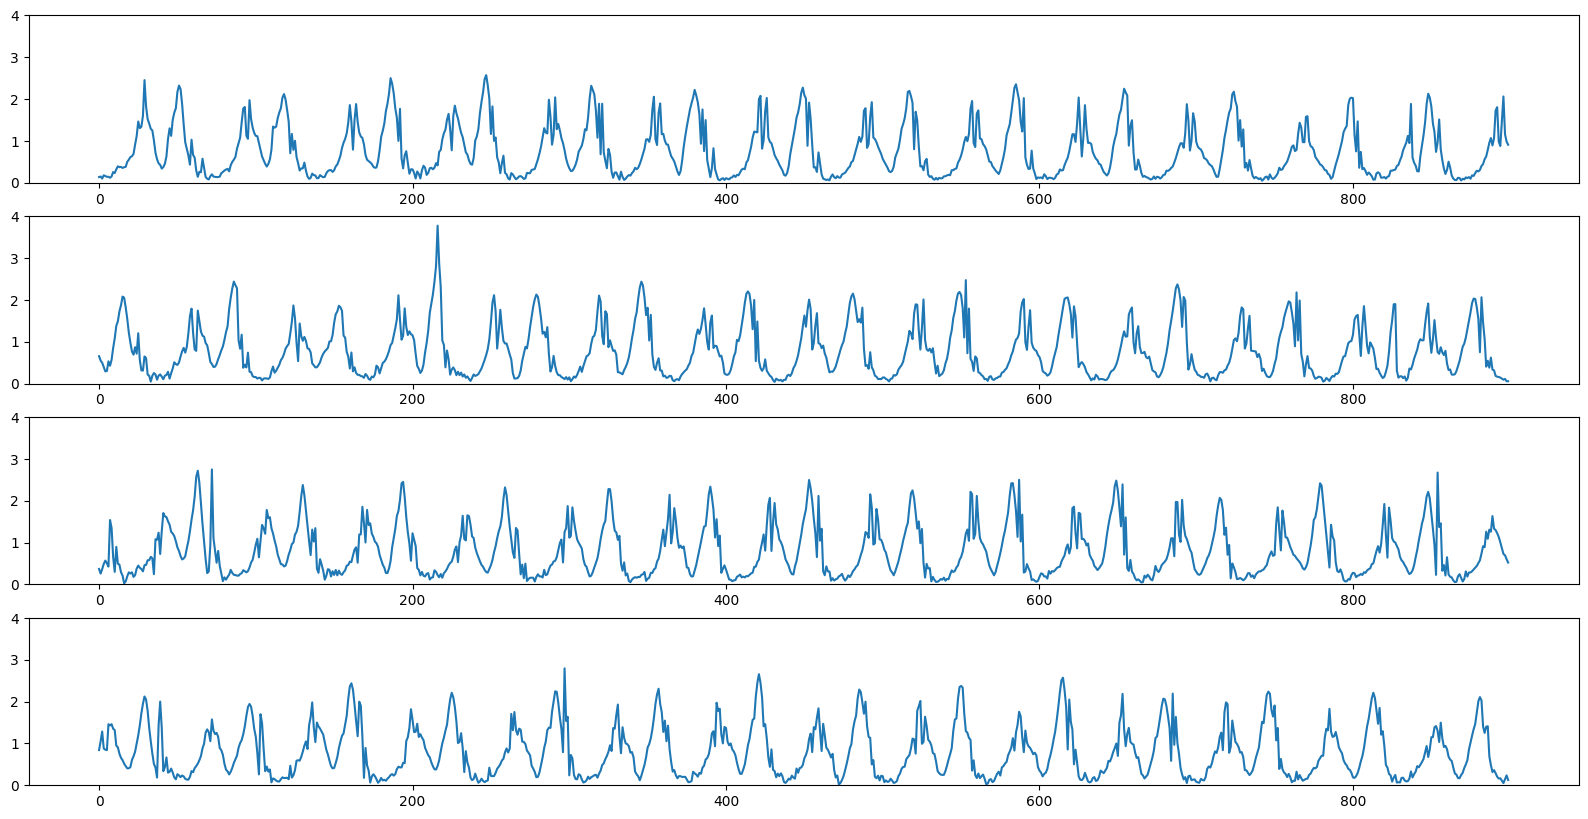

In [13]:
## plot the acceleration

# simple graphs
fig, ax = plt.subplots(4,1, figsize=(20, 10))

for idx, a in enumerate(accel_lists):
    ax[idx].plot(a[3])
    ax[idx].set_ylim(0,4)